In [19]:
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train['source'] = 'train'
test['source'] = 'test'

df = pd.concat([train, test], ignore_index=True)
print("Combined shape:", df.shape)


Combined shape: (1309, 13)


In [20]:
df.info()                       # Check types and non-null counts
missing = df.isnull().sum().sort_values(ascending=False)
missing[missing > 0]           # View columns with missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  source       1309 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 133.1+ KB


Cabin       1014
Survived     418
Age          263
Embarked       2
Fare           1
dtype: int64

In [22]:
# Identify extremely sparse columns (e.g., >90% missing)
threshold = 0.9
cols_to_drop = missing[missing / len(df) > threshold].index
df.drop(columns=cols_to_drop, inplace=True)

# Example for numerical variables
for col in df.select_dtypes(include='number').columns:
    df[col].fillna(df[col].median(), inplace=True)

# Example for categorical variables
for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Drop duplicates
df.drop_duplicates(inplace=True)


In [23]:
# Get descriptive statistics for all columns
summary = df.describe(include='all').T
# See count of unique values per feature
unique_counts = df.nunique().sort_values(ascending=False)


/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


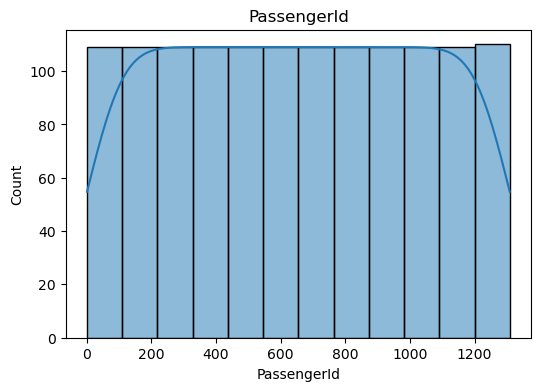

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


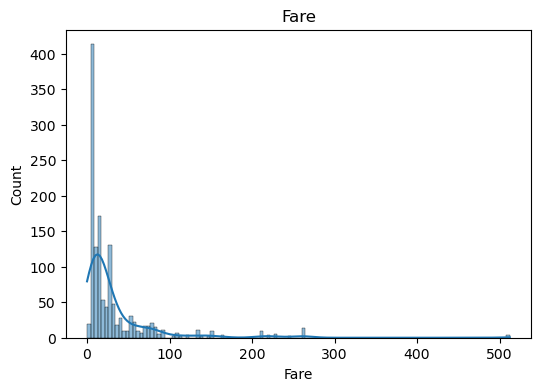

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


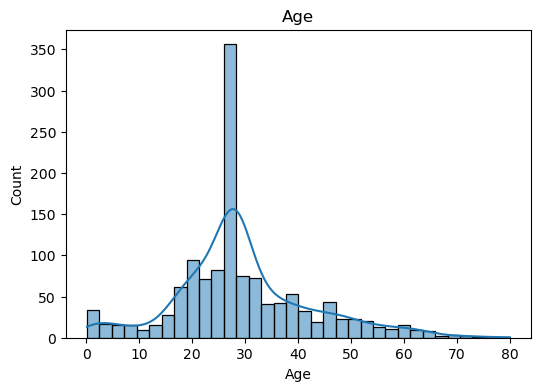

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


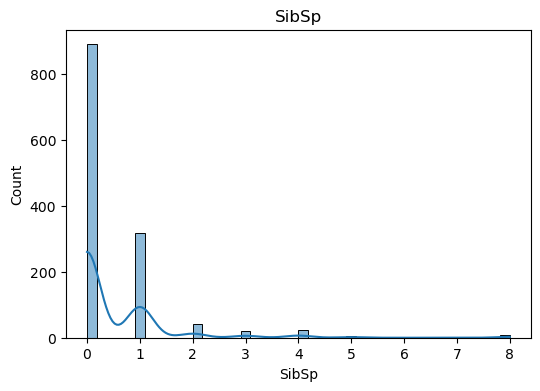

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


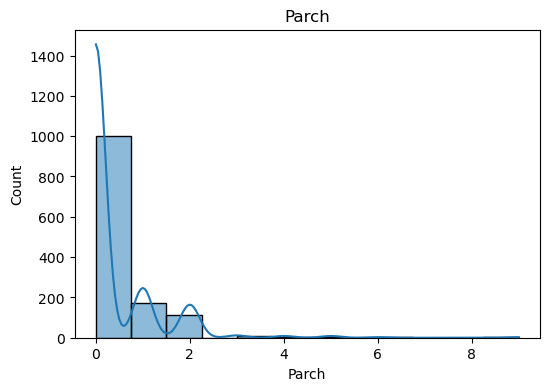

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


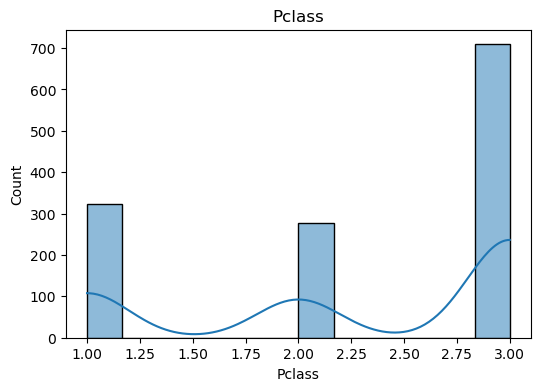

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


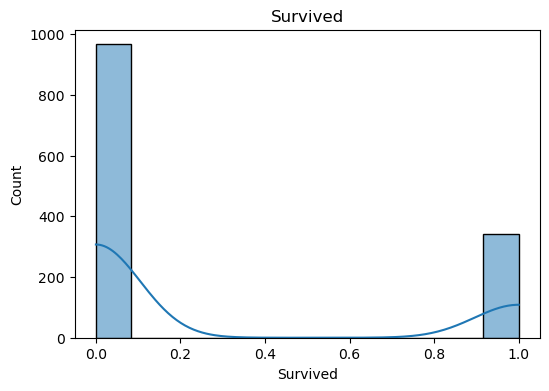

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# For numerical columns: top N by variance
numeric_cols = df.select_dtypes(include='number').columns
top_var = df[numeric_cols].std().sort_values(ascending=False).head(20).index

for col in top_var:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.show()


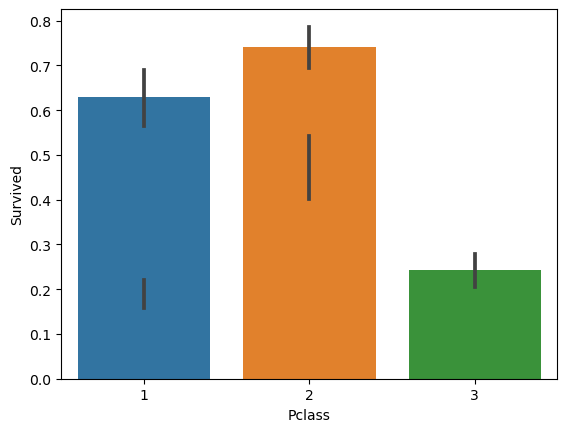

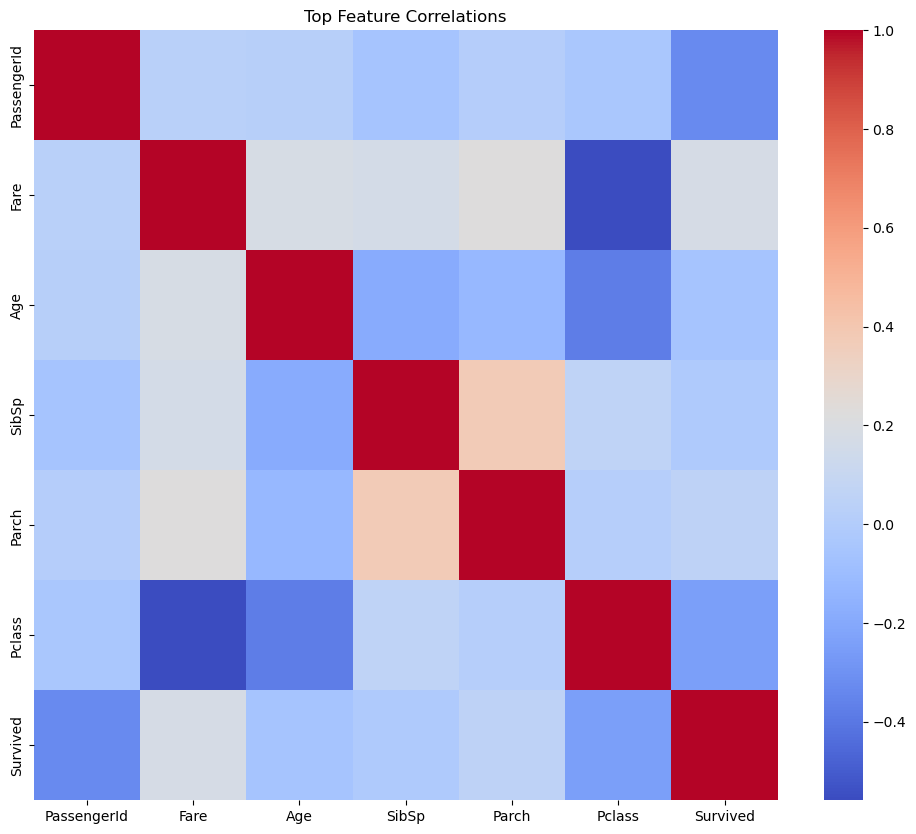

In [25]:
# Assuming 'Survived' exists in train part
sns.barplot(x='Sex', y='Survived', data=df[df['source']=='train'])
sns.barplot(x='Pclass', y='Survived', data=df[df['source']=='train'])

# Correlation heatmap: top numeric features
subset = df[top_var]
plt.figure(figsize=(12,10))
sns.heatmap(subset.corr(), cmap='coolwarm', annot=False)
plt.title('Top Feature Correlations')
plt.show()


/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='AgeGroup', ylabel='Survived'>

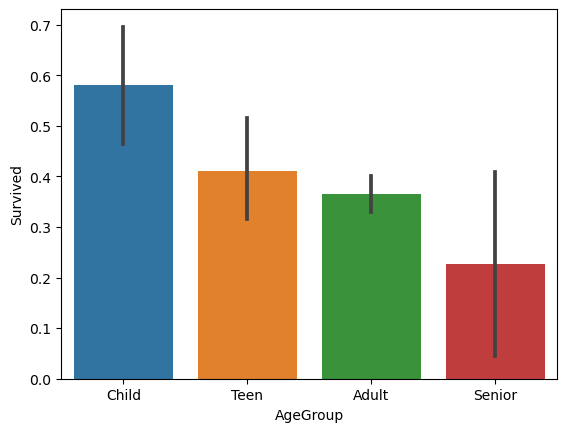

In [26]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[0,12,19,60,99],
                         labels=['Child','Teen','Adult','Senior'])
sns.barplot(x='AgeGroup', y='Survived', data=df[df['source']=='train'])


In [32]:
df.to_csv("cleaned_titanic_dataset.csv", index=False)
